S union T : set of all elements that belong to either S or T
S intersection T: set of all the common elements to both S and T
S difference T: set of elements that are in S and not in T
S disjoint_union T: a tagged union that enforces sets S and T to be disjoint even if they have the same elements
S cartesian_product T (S x T): set of all ordered pairs (s, t) where s belongs to S and t belongs to T
Quotient by an equivalence relation (S/~): given an equivalence relation ~ on S, the quotient set is the collection of equivalence classes [s]
    wheere [s] = {x belongs to S : x ~ s}, where every element in [s] is related to s by the given equivalence relation, where the elemnts collapse
    into a class where every element in that class are related to each other with ~ relation 


clustering in data science involves grouping points that share certain invariant (unchanging properties) and is analogous to quotient:
    - points in dataset are grouped based on similarity just as quotient where elements are grouped based on the equivalence relation
    - resulting cluster can be used as representation of points that have equivalent relation
    - can be used to identify clusters based on ibvariants

concept of quotient can also be used to reduce the number of variables or features in a dataset while preserving as much relevant information as possible reduces computational complexities
    - collapsing elements that share an equivalence relation into a single class or representation
    - grouping features that have similar role or behavior

quotienting in feature reduction:
    - identifying invariant features: if two properties or features always vary together, they can be collapsed into one
    - symmetry based reduction: data that have symmetries can be grouped
    - identify clusters of similar features and replace them with a single representation (or a representation of a class)

In [5]:
import itertools
# disjoint union of two sets
def disjoint_union(S,T):
    s_tagged = {(s, 0) for s in S}
    t_tagged = {(t, 1) for t in T}
    return s_tagged | t_tagged


# cartesian product of two sets
def cartesian_product(S, T):
    return {(s, t) for s in itertools.product(S, T)}

In [11]:
from collections import defaultdict
#
"""
quotient set breaks down the data by grouping elements into equivalence classes based on a given key function
each element in the input set is assigned a key and elements with the same key are placed into one class or group

"""
def quotient_set(S, equivalent_func):
    """
    parameters:
        - S: a set of elements or data to be partitioned
        - equivalent_func: a function that assigns a key to each element determined by the desired equivalent relation

    a default dictionary of set is initialized where each key represents a class and holds set of elements that belongs to the given class
    if the key does not exist in classes, it automatically creates an empty set for it

    key_function is applied to the each element in the set, where intially upon generating a key if it does not exist

    """
    classes = defaultdict(set)
    for s in S:
        k = equivalent_func(s)
        classes[k].add(s)
    return dict(classes)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

In [6]:
# generate a swiss roll data set
n_samples = 1000
noise = 0.05
data,_ = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=32)

def filter_data_by_x(data, lower, upper):
    mask = (data[:, 0] >= lower) & (data[:,0] <= upper)
    return data[mask]

In [7]:
filtered_data = filter_data_by_x(data=data, lower=5, upper=10)

In [12]:
def group_data_by_x(data, precision=1):
    """
    groups data points into equivalence classes based on the rounded first coordinates

    parameters:
        - data: array of data, precision: number of decimal places to round the value
    
    returns a dictionary mapping the rounded x-coordinate to the subset of data points

    key_func: assigns a key (rounded x value) to each point, where two points belong to the samne group if they have the same rounded x-coordinate
    data_tuples: tuples are used as they are hashable and usable in sets or as dictionary keys
    """
    key_func = lambda row: round(row[0], precision)
    data_tuples = {tuple(row) for row in data}

    # compute the groups using the quotient set method
    groups = quotient_set(data_tuples, key_func)
    return groups


In [ ]:
grouped_data = group_data_by_x(data=data, precision=0)


{2.0: {(2.1788307801790268, 9.773136200632226, -4.639045345813353), (1.5402301712126933, 0.3285783691898739, 13.872362070434919), (1.5169161307399404, 15.004287501422533, -4.773548251614157), (1.507343843237099, 6.092989651183608, -4.753237294873507), (1.6008249702552997, 4.849290874626805, -4.74240405926781), (2.3204045387832806, 9.754936995918245, 7.111425292700383), (2.4484732006743584, 10.311713615045356, 13.767662752525936), (2.0899616366038294, 17.18201880847144, -4.76231951219387), (1.8761265354655214, 5.718195127943279, 7.498141972396552), (2.2225156294842927, 0.7649674698998645, -4.628240343752385), (1.6269156723696614, 10.98228276798257, 7.438729109243155), (1.7241462206542832, 7.678343384193022, -4.824825280044163), (2.2221976795554728, 3.7486200276752455, -4.548886124742839), (2.454838095207933, 6.459599038486732, 7.057254787168606), (2.0013747718853874, 20.584510458580496, 13.827006178801847), (2.1894789860592074, 4.70773684593871, 7.283375968237436), (2.3120739024706918, 

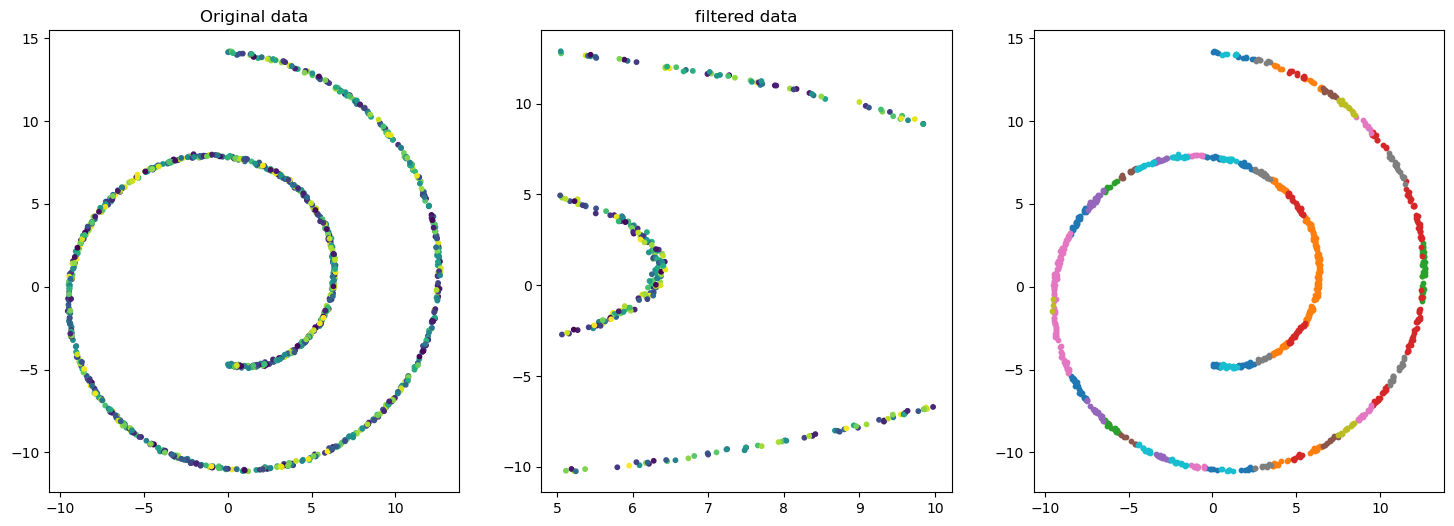

In [19]:
# visualize using swiss roll dataa

fig, ax = plt.subplots(1, 3, figsize=(18, 6))


# plot swiss roll projections
ax[0].scatter(data[:, 0], data[:, 2], c=data[:,1], cmap='viridis', s=10)
ax[0].set_title('Original data')
ax[1].scatter(filtered_data[:, 0], filtered_data[:,2], c=filtered_data[:, 1], cmap='viridis', s=10)
ax[1].set_title('filtered data')


# plot the grouped data by choosing different colors for different groups by looping through grouped data and assigning colors accordingly
"""
plt.cm: matplotlib's colormap module that provides different color schemes to visualize data, this method could help in visualizing different/distinct groups
tab10: categorical colormap that provides distinct and easily distinguishable colors and is useful as groups have limited number of equivalent classes
"""

colors = plt.cm.tab10(np.linspace(0,1, len(grouped_data)))

"""
grouped_data.items retrieves each equivalent class and it's corresponding set of data points
zip pair each group with unique color, instead of manual tracking, zip automatically pairs elements from both grouped data items and colors
"""
for (grop_key, points), color in zip(grouped_data.items(), colors):

    # convert to np array for plotting
    pts = np.array(list(points))

    ax[2].scatter(pts[:, 0], pts[:, 2], color=color, label = f"x+ {grop_key}", s=10)

In [ ]:
import Geop